<a href="https://colab.research.google.com/github/gpolonio15/Detecci-nFraude/blob/main/Deteccion_Fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install termcolor

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4830 sha256=ec5b269c2909bc1fa708f9483ef7a02b67cb179a66227a5c93acb4abd418a271
  Stored in directory: /Users/gpolonio15/Library/Caches/pip/wheels/a0/16/9c/5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install xgboost

     |████████████████████████████████| 1.3 MB 4.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from termcolor import colored as cl 
import itertools 

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score

In [ ]:
fraude = fetch_openml(name="CreditCardFraudDetection", version=2, as_frame=True)
datos = np.column_stack((fraude.data, fraude.target))
datos = pd.DataFrame(datos,columns = np.append(fraude.feature_names, "Class"))
datos.drop('Time', axis=1)
dic_replace = {'False': "0",
               'True': "1"}

datos['Class'] = datos['Class'] \
                     .map(dic_replace) \
                     .fillna(datos['Class'])
print(datos.head(4))

  Time        V1         V2       V3        V4         V5         V6  \
0    0  -1.35981 -0.0727812  2.53635   1.37816  -0.338321   0.462388   
1    0   1.19186   0.266151  0.16648  0.448154  0.0600176 -0.0823608   
2    1  -1.35835   -1.34016  1.77321   0.37978  -0.503198     1.8005   
3    1 -0.966272  -0.185226  1.79299 -0.863291 -0.0103089     1.2472   

         V7         V8        V9  ...        V21        V22       V23  \
0  0.239599  0.0986979  0.363787  ... -0.0183068   0.277838 -0.110474   
1 -0.078803  0.0851017 -0.255425  ...  -0.225775  -0.638672  0.101288   
2  0.791461   0.247676  -1.51465  ...   0.247998   0.771679  0.909412   
3  0.237609   0.377436  -1.38702  ...    -0.1083  0.0052736 -0.190321   

         V24       V25       V26        V27        V28  Amount Class  
0  0.0669281  0.128539 -0.189115   0.133558 -0.0210531  149.62     0  
1  -0.339846   0.16717  0.125895 -0.0089831  0.0147242    2.69     0  
2  -0.689281 -0.327642 -0.139097 -0.0553528 -0.0597518  378.

In [ ]:
datos['Class'] = datos['Class'].astype(int)

In [ ]:

cases = len(datos)
nonfraud_count = len(datos[datos.Class == 0])
fraud_count = len(datos[datos.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(nonfraud_count), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of fraud cases is {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 284807
Number of Non-fraud cases are 284315
Number of Non-fraud cases are 492
Percentage of fraud cases is 0.17
--------------------------------------------


In [ ]:
nonfraud_cases = datos[datos.Class == 0]
fraud_cases = datos[datos.Class == 1]

print(cl('CASE AMOUNT STATISTICS', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('NON-FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(nonfraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(fraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))


CASE AMOUNT STATISTICS
--------------------------------------------
NON-FRAUD CASE AMOUNT STATS
count     284315.0
unique     32701.0
top            1.0
freq       13575.0
Name: Amount, dtype: float64
--------------------------------------------
FRAUD CASE AMOUNT STATS
count     492.0
unique    259.0
top         1.0
freq      113.0
Name: Amount, dtype: float64
--------------------------------------------


In [ ]:
sc = StandardScaler()
amount = datos['Amount'].values

datos['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(cl(datos['Amount'].head(10), attrs = ['bold']))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


In [ ]:

X = datos.drop('Class', axis = 1).values
y = datos['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:20])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:20])

X_train samples :  [[53150.0 -1.1150474299356499 1.03558275921364 0.800712440904129
  -1.06039825316222 0.0326211689738033 0.8534221603099509
  -0.614243479679798 -3.23116112166802 1.53994797527789
  -0.816908791399585 -1.3055920090728 0.10817719891239301
  -0.8596095795107299 -0.0719342107717086 0.906655628159579
  -1.72092960883641 0.7978532208439809 -0.0067593977911279
  1.9567780560438202 -0.6448955647657021 3.0203853270596497
  -0.539617976077438 0.033156488577143 -0.774945765880841
  0.10586781188547699 -0.43085348217760794 0.22973693615725196
  -0.0705913036453564 -0.30145417675532704]]
X_test samples :  [[125821.0 -0.32333357234920695 1.05745524547602 -0.0483411518056082
  -0.607204308469926 1.25982114985563 -0.0917607168463734
  1.15910149881154 -0.12433460579324301 -0.174639536425237
  -1.6444006451833897 -1.11886302116203 0.202647309859633
  1.14596494837297 -1.80235955648842 -0.24717793192731197
  -0.0609453515056588 0.846605737903167 0.379454386602278
  0.8472622447749741 

In [ ]:
# 1. Arbol de decisión

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

# 2. K-Nearest Neighbors

n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

# 3. Regresión logística

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

# 4. SVM 

svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

# 5. Random Forest Tree

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.9993679997191109
------------------------------------------------------------------------
Accuracy score of the KNN model is 0.9983848881710614
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.9990168884519505
------------------------------------------------------------------------
Accuracy score of the SVM model is 0.9982268881008391
------------------------------------------------------------------------
Accuracy score of the Random Forest Tree model is 0.9992977774656788
------------------------------------------------------------------------


In [ ]:
print(cl('F1 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

F1 SCORE
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.8105263157894738
------------------------------------------------------------------------
F1 score of the KNN model is 0.1636363636363636
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.7333333333333334
------------------------------------------------------------------------
F1 score of the SVM model is 0.0
------------------------------------------------------------------------
F1 score of the Random Forest Tree model is 0.7727272727272727
------------------------------------------------------------------------


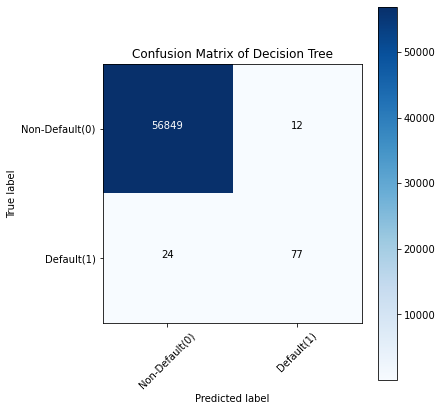

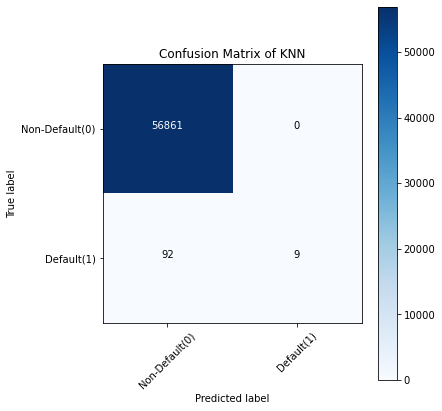

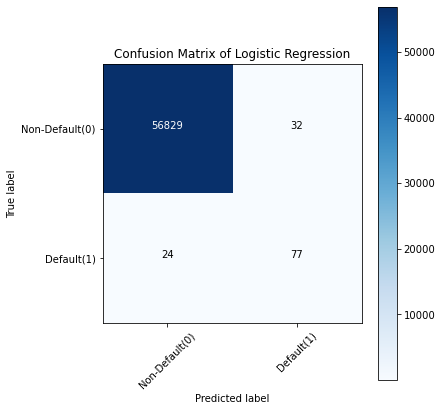

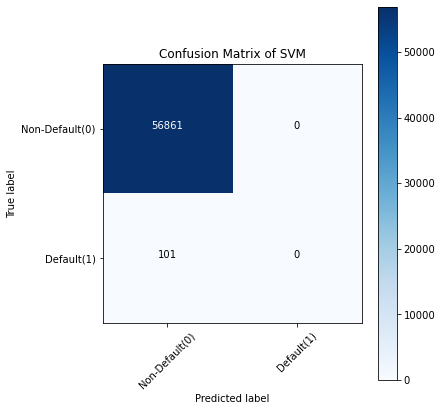

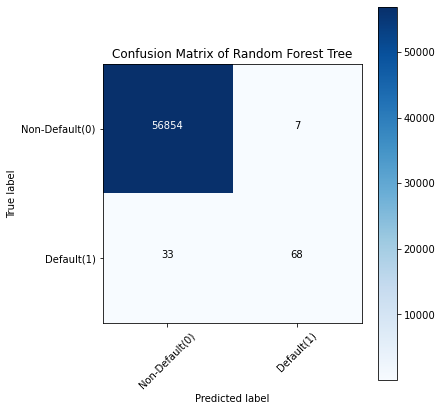

In [ ]:
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machine
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

# 1. Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

# 2. K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

# 3. Logistic regression

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

# 4. Support Vector Machine

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

# 5. Random forest tree

rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

